In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import statsmodels.api as sm
%pylab inline
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [25]:
irr = pd.read_csv('2_4_2021_updated_compiled_dataset.csv')
cpuc_lg = pd.read_csv('cpuc_compiled.csv')


In [26]:
cpuc_lg = cpuc_lg.drop(columns = 'Unnamed: 0')

In [27]:
irrr = irr[['IRR', 'Tax Revenue (2016-2018)']]


In [28]:
cpuc_lg = cpuc_lg.join(irrr)

In [29]:
cpuc_lg.head()

,County,Population,Mean Income,Tax Revenue (2018),CES Score Median,TotalFirstYearGrosskWh,TotalFirstYearGrossTherm,Budget,Total Claims,Total Programs,IRR,Tax Revenue (2016-2018)
0,Alameda,1656754,76626,3057808028,21.532906,0.0,0.0,0.0,0.0,0.0,0.270123,"2,881,750,725"
1,Alpine,1039,78945,20470009,11.343357,0.0,0.0,0.0,0.0,0.0,0.656045,"18,809,887"
2,Amador,38429,51453,77617058,23.257549,0.0,0.0,0.0,0.0,0.0,0.502563,"72,724,843.33"
3,Butte,225817,62405,423294813,20.033261,0.0,0.0,0.0,0.0,0.0,0.434555,"399,351,348.33"
4,Calaveras,45514,70651,111775477,15.180852,0.0,0.0,0.0,0.0,0.0,0.509595,"100,835,428.67"


In [30]:
cpuc_lg.drop(columns = 'Tax Revenue (2018)', inplace = True)

In [39]:
cpuc_lg['Tax Revenue (2016-2018)'] = cpuc_lg['Tax Revenue (2016-2018)'].str.replace(',', '')
cpuc_lg['Tax Revenue (2016-2018)'] = cpuc_lg['Tax Revenue (2016-2018)'].astype('float64')

In [40]:
Y = cpuc_lg['Budget'] #dependent variables
B1 = cpuc_lg['TotalFirstYearGrosskWh']
B2 = cpuc_lg['TotalFirstYearGrossTherm']

In [41]:
X = cpuc_lg[['Population', 'Mean Income', 'Tax Revenue (2016-2018)', 'CES Score Median', 'IRR']]

In [42]:
cpuc_lg.to_csv('better_cpuc_compiled.csv')

In [43]:
lm = sm.OLS(Y,X)
lm1 = sm.OLS(B1, X)
lm2 = sm.OLS(B2, X)

In [44]:
budget_model = lm.fit()
kWh_savings_model = lm1.fit()
Therm_savings_model = lm2.fit()

In [45]:
print(budget_model.summary())
print(kWh_savings_model.summary())
print(Therm_savings_model.summary())



                                 OLS Regression Results                                
Dep. Variable:                 Budget   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.451
Method:                 Least Squares   F-statistic:                              10.52
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                    4.74e-07
Time:                        19:28:27   Log-Likelihood:                         -947.20
No. Observations:                  58   AIC:                                      1904.
Df Residuals:                      53   BIC:                                      1915.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

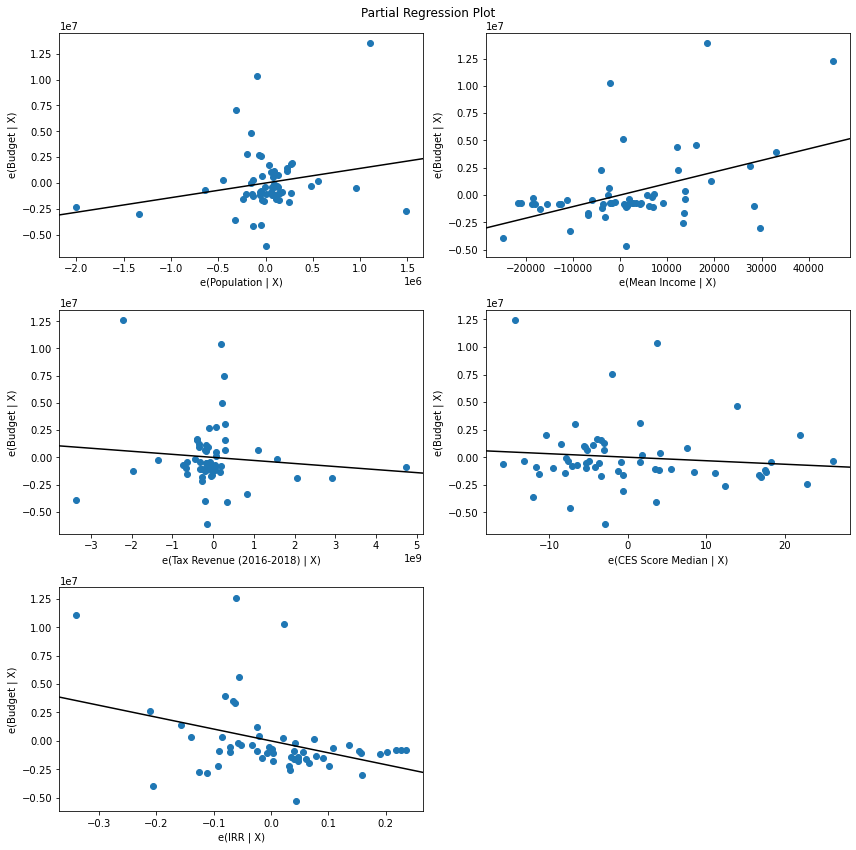

In [46]:
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_partregress_grid(budget_model, fig=fig)
plt.savefig('second_budget_regression')


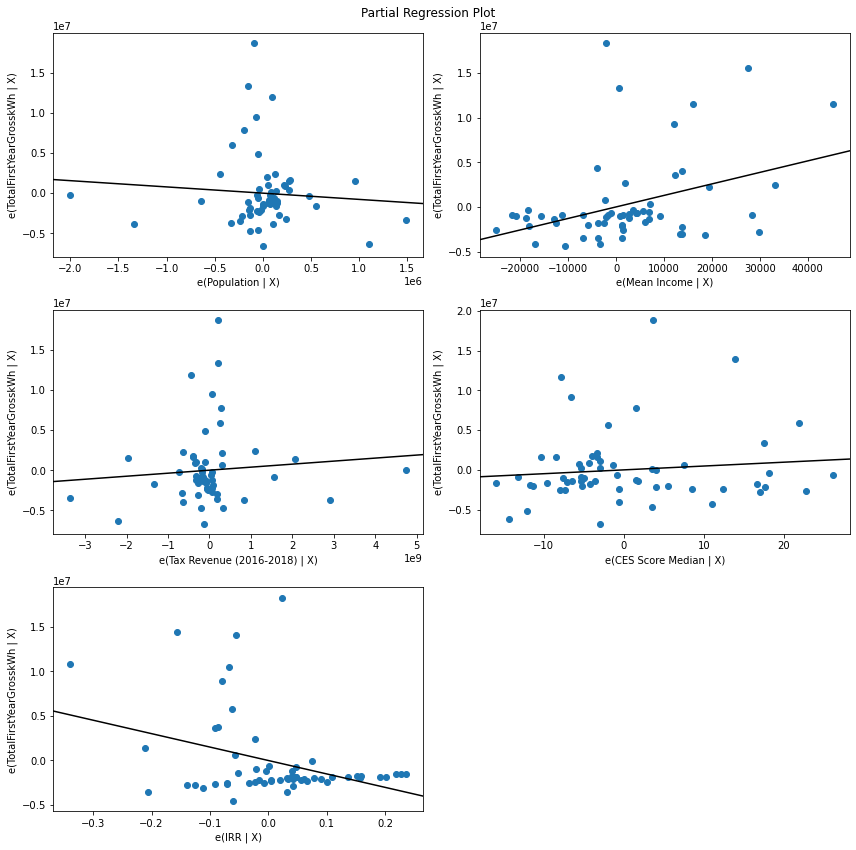

In [47]:
pig = plt.figure(figsize=(12, 12))

sm.graphics.plot_partregress_grid(kWh_savings_model, fig=pig)
plt.savefig('second_kWh_regression')


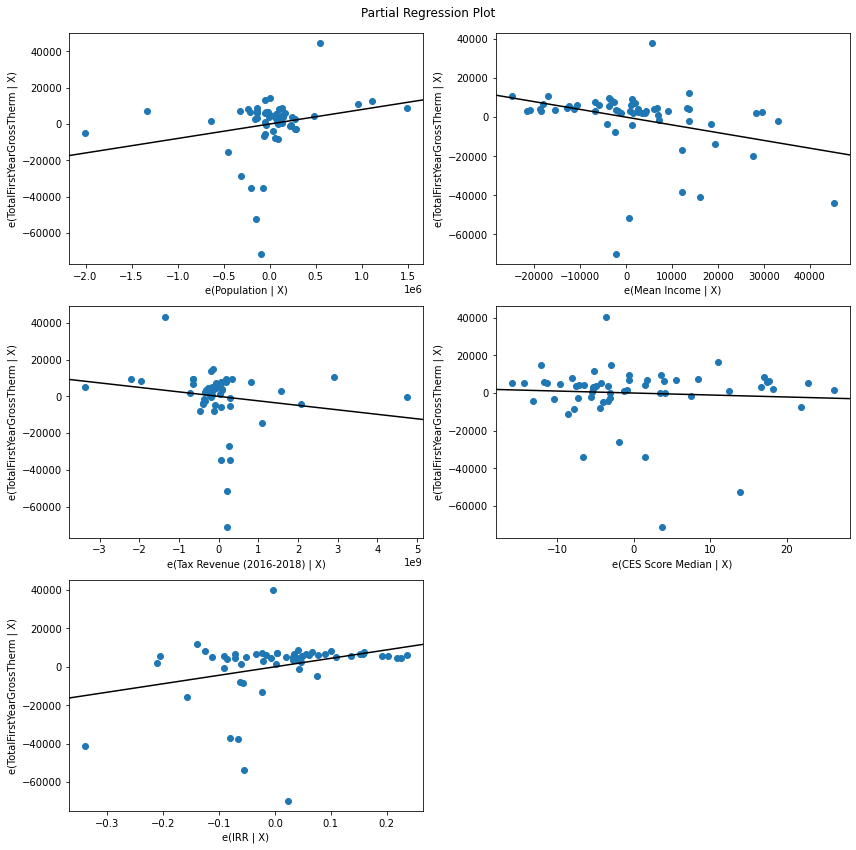

In [48]:
big = plt.figure(figsize=(12, 12))

sm.graphics.plot_partregress_grid(Therm_savings_model, fig=big)
plt.savefig('second_therm_regression')


In [50]:
test = pd.read_csv('better_cpuc_compiled.csv')

In [52]:
test.dtypes

Unnamed: 0                    int64
County                       object
Population                    int64
Mean Income                   int64
CES Score Median            float64
TotalFirstYearGrosskWh      float64
TotalFirstYearGrossTherm    float64
Budget                      float64
Total Claims                float64
Total Programs              float64
IRR                         float64
Tax Revenue (2016-2018)     float64
dtype: object

**Taking out counties that have never participated in an ee program before**

In [53]:
only_programs = cpuc_lg[cpuc_lg['Total Programs'] != 0]

In [54]:
YY = only_programs['Budget'] #dependent variables
BB1 = only_programs['TotalFirstYearGrosskWh']
BB2 = only_programs['TotalFirstYearGrossTherm']

In [55]:
XX = only_programs[['Population', 'Mean Income', 'Tax Revenue (2016-2018)', 'CES Score Median', 'IRR']]

In [56]:
m = sm.OLS(YY,XX)
m1 = sm.OLS(BB1, XX)
m2 = sm.OLS(BB2, XX)

In [57]:
budget_model_programs = m.fit()
kWh_savings_model_programs = m1.fit()
Therm_savings_model_programs = m2.fit()

In [58]:
print(budget_model_programs.summary())
print(kWh_savings_model_programs.summary())
print(Therm_savings_model_programs.summary())



                                 OLS Regression Results                                
Dep. Variable:                 Budget   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              9.287
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                    0.000209
Time:                        19:36:42   Log-Likelihood:                         -363.05
No. Observations:                  22   AIC:                                      736.1
Df Residuals:                      17   BIC:                                      741.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

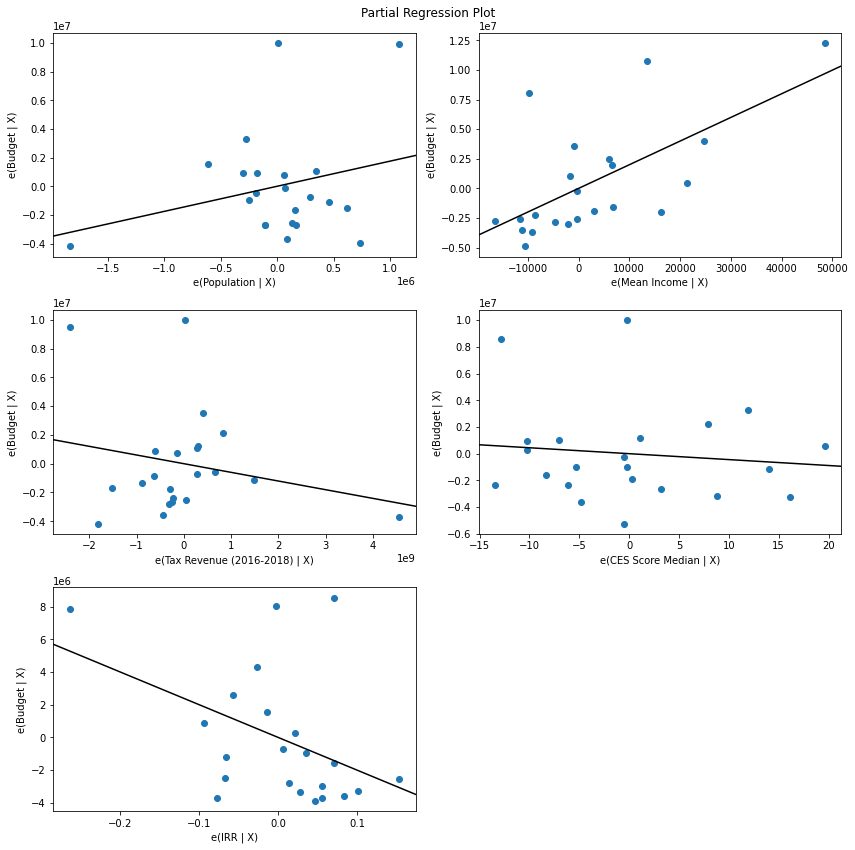

In [60]:
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_partregress_grid(budget_model_programs, fig=fig)
plt.savefig('second_budget_regression_programs')
    

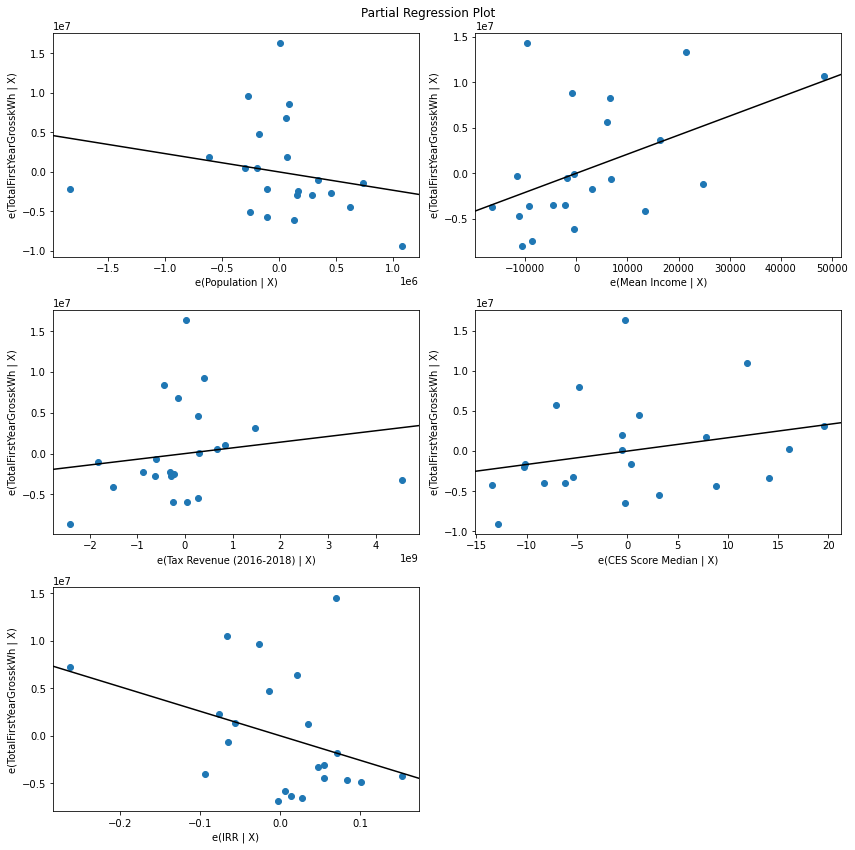

In [61]:
pig = plt.figure(figsize=(12, 12))

sm.graphics.plot_partregress_grid(kWh_savings_model_programs, fig=pig)
plt.savefig('second_kWh_regression_programs')


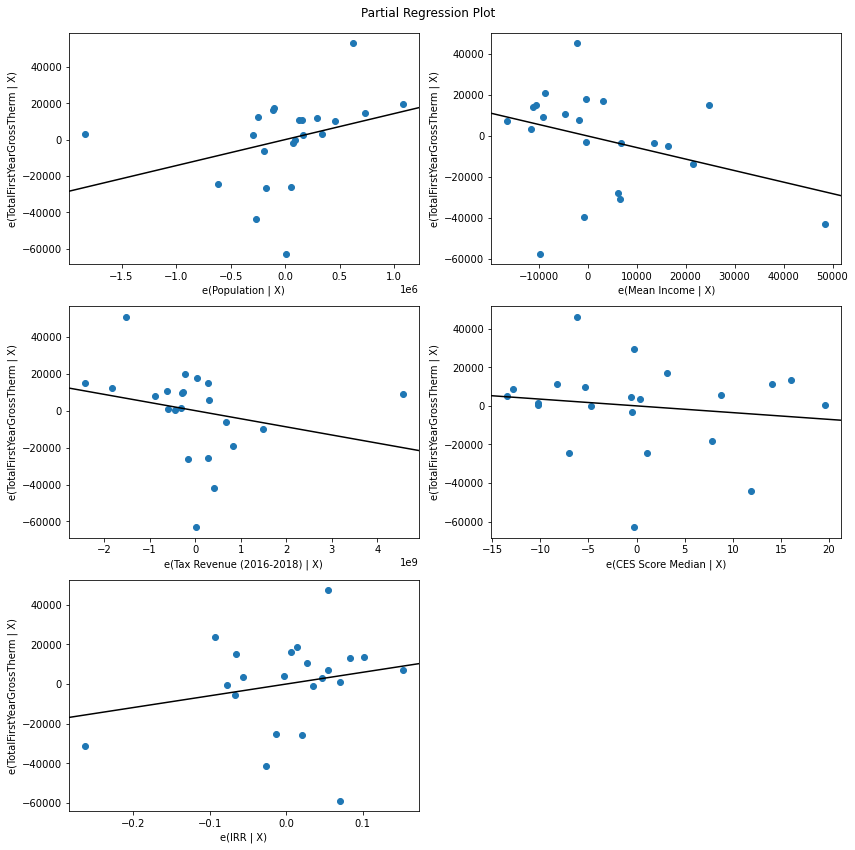

In [62]:
big = plt.figure(figsize=(12, 12))

sm.graphics.plot_partregress_grid(Therm_savings_model_programs, fig=big)
plt.savefig('second_therm_regression_programs')
